# CNN을 활용한 CIFAR-10 분류

## 1. 패키지 불러오기

In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

Using TensorFlow backend.


## 2. 데이터 전처리

In [2]:
(X_tr, y_tr), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [0]:
X_train = X_tr[:40000]
y_train = y_tr[:40000]

In [0]:
X_val = X_tr[40000:]
y_val = y_tr[40000:]

In [5]:
X_train.shape, y_train.shape

((40000, 32, 32, 3), (40000, 1))

In [6]:
X_val.shape, y_val.shape

((10000, 32, 32, 3), (10000, 1))

In [7]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [0]:
n_class = 10 # 총 10개의 카테고리를 가지고 있는 이미지 데이터로 10개의 클래스를 출력해야한다.

In [0]:
X_train = X_train.astype('float32') / 255.0

In [0]:
X_val = X_val.astype('float32') / 255.0

In [0]:
X_test = X_test.astype('float32') / 255.0

In [0]:
y_train = to_categorical(y_train, n_class)

In [0]:
y_val = to_categorical(y_val, n_class)

In [ ]:
y_test = to_categorical(y_test, n_class)

# 3. 모델링

In [0]:
from keras.models import *
from keras.layers import *

In [16]:
input_layer = Input(shape = (32, 32, 3))
x = Conv2D(64, (3,3), activation = 'relu')(input_layer)
x = Conv2D(64, (3,3), activation = 'relu')(x)
x = MaxPooling2D(pool_size = (2,2))(x)
x = Conv2D(64, (3,3), activation = 'relu')(x)
x = Conv2D(64, (3,3), activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Conv2D(32, (3,3), activation = 'relu')(x)
x = Conv2D(32, (3,3), activation = 'relu')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(32, activation = 'relu')(x)
output_layer = Dense(10, activation = 'softmax')(x)
model = Model(input_layer, output_layer)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.









In [17]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0   

In [18]:
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [19]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 20, shuffle = True, validation_data = (X_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 20s 502us/step - loss: 1.6348 - acc: 0.3945 - val_loss: 1.7235 - val_acc: 0.4090
Epoch 2/20
40000/40000 [==============================] - 13s 328us/step - loss: 1.2898 - acc: 0.5369 - val_loss: 1.1937 - val_acc: 0.5726
Epoch 3/20
40000/40000 [==============================] - 13s 331us/step - loss: 1.1088 - acc: 0.6049 - val_loss: 1.0557 - val_acc: 0.6194
Epoch 4/20
40000/40000 [==============================] - 13s 337us/step - loss: 1.0072 - acc: 0.6417 - val_loss: 1.1303 - val_acc: 0.5958
Epoch 5/20
40000/40000 [==============================] - 13s 337us/step - loss: 0.9385 - acc: 0.6680 - val_loss: 1.0648 - val_acc: 0.6262
Epoch 6/20
40000/40000 [==============================] - 13s 330us/step - loss: 0.8779 - acc: 0.6887 - val_loss: 0.9718 - val_acc: 0.6606
Epoch 7/20
40000/400

In [20]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 104us/step


[0.8195055066108704, 0.7394]

# 4. 결과 시각화

In [0]:
pic = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [0]:
pred = model.predict(X_test)

In [0]:
pred_pic = pic[np.argmax(pred, axis = -1)]

In [0]:
real = pic[np.argmax(y_test, axis = -1)]

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
n = 10
indices = np.random.choice(range(len(X_test)), n)

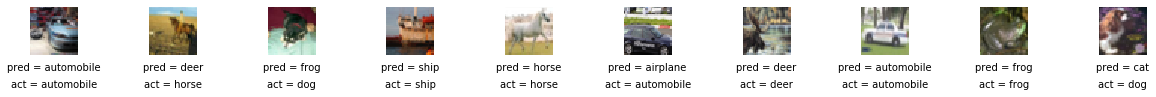

In [27]:
fig =  plt.figure(figsize = (20,6))
fig.subplots_adjust(wspace=1.5, hspace = .4)

for i, idx in enumerate(indices):
  picture = X_test[idx]
  ax = fig.add_subplot(1, 10, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(pred_pic[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(real[idx]), fontsize = 10, ha= 'center', transform = ax.transAxes)
  ax.imshow(picture)

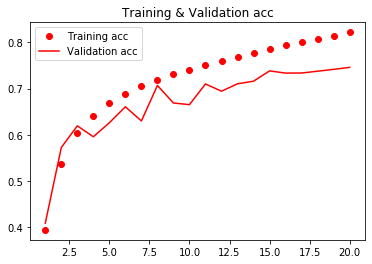

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training & Validation acc')
plt.legend()
plt.show()

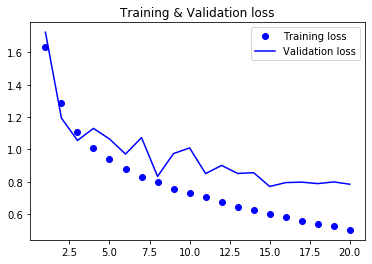

In [30]:
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training & Validation loss')
plt.legend()
plt.show()